# Data imports

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics, tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

# Abbreviations 

m = mathematics dataset
p = Portuguese dataset
dtr = Decision tree regressor
lin = Linear regression
SKB = SelectKBest
fi = Feature importance
RMSE = Root mean square error

# Data read

In [101]:
# Define column names
columns=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid',
                                    'activities','nursery','higher','internet','romantic','famrel','freetime','goout',
                                    'Dalc','Walc','health','absences','G1','G2','G3']

# student_mat students in mathematics, drop G1 and G2
student_math = pd.read_csv('student-mat.csv',sep=';',header=0, names=columns)
student_math = student_math.drop(['G1', 'G2'], axis=1)

# student_por students in Portuguese, drop G1 and G2
student_port = pd.read_csv('student-por.csv',sep=';',header=0, names=columns)
student_port = student_port.drop(['G1', 'G2'], axis=1)

student_port.head(10)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,6,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,2,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13


# Encoding the data

In [102]:
columns_categorical = ['school','sex','address','famsize',
                       'Pstatus','Mjob','Fjob','reason', 'guardian', 'schoolsup', 
                      'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
columns_numerical = ['age','Medu','Fedu','traveltime','studytime',
                        'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc','health', 'absences', 'G3']

student_math_encoded = pd.DataFrame()
student_port_encoded = pd.DataFrame()

for col in columns_categorical:
  LE = LabelEncoder()
  dt_mat = LE.fit_transform(student_math[col])
  student_math_encoded[col] = dt_mat
  dt_por = LE.fit_transform(student_port[col])
  student_port_encoded[col] = dt_por

# combine with the numerical columns
for col in columns_numerical:
  student_math_encoded[col] = student_math[col]
  student_port_encoded[col] = student_port[col]
    

# Histogram for Math final grade (G3)

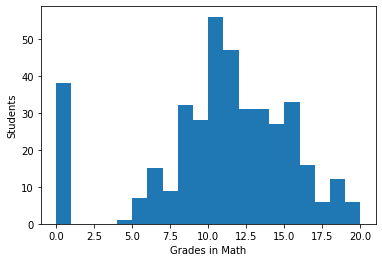

In [103]:
# Histogram showing Math final grade distribution

plt.hist(student_math['G3'],bins=20)
plt.xlabel('Grades in Math')
plt.ylabel('Students')
plt.show()

# Histogram for Portuguese final grade (G3)

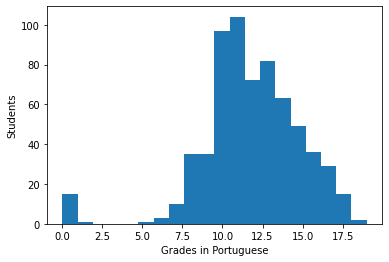

In [104]:
# Histogram showing Portuguese final grade distribution

plt.hist(student_port['G3'],bins=20)
plt.xlabel('Grades in Portuguese')
plt.ylabel('Students')
plt.show()

# Pearson Correlation Matrix for Math dataset

In [105]:
corr = student_math_encoded.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
school,1.000000,-0.012286,-0.279797,0.064866,0.045923,-0.056670,0.018974,-0.090010,0.011109,-0.139789,-0.164967,-0.017083,-0.116946,-0.089277,-0.024150,-0.133578,0.060700,0.377610,-0.133333,-0.079807,0.242308,-0.090681,0.059804,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.045017
sex,-0.012286,1.000000,-0.028504,0.089862,0.023443,0.191421,0.084957,-0.095867,-0.071343,-0.138271,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023,-0.028606,0.078228,0.034878,0.059722,-0.306268,0.044436,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.103456
address,-0.279797,-0.028504,1.000000,0.072472,-0.042572,0.108818,-0.001911,-0.047891,-0.044512,0.024712,0.023903,0.052800,-0.051360,0.059589,0.042854,0.216842,0.005257,-0.146722,0.138804,0.072178,-0.328096,-0.020912,-0.078578,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.105756
famsize,0.064866,0.089862,0.072472,1.000000,-0.149612,0.071386,-0.084448,-0.019212,-0.002718,-0.028642,-0.112893,-0.013882,-0.000113,0.102088,-0.005806,0.000720,0.034395,0.037847,-0.043068,-0.058879,0.063493,-0.073595,-0.015769,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.081407
Pstatus,0.045923,0.023443,-0.042572,-0.149612,1.000000,-0.054476,0.033892,-0.003553,-0.108715,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451,0.029598,-0.123565,-0.088730,0.028265,0.024294,-0.003339,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.058009
Mjob,-0.056670,0.191421,0.108818,0.071386,-0.054476,1.000000,0.196758,0.022022,0.014787,-0.040958,0.050667,0.096566,0.098754,0.095848,0.097887,0.216969,-0.062999,-0.069104,0.454805,0.243327,-0.109752,-0.023097,-0.073377,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.102082
Fjob,0.018974,0.084957,-0.001911,-0.084448,0.033892,0.196758,1.000000,-0.027688,-0.080511,-0.011657,-0.030159,-0.040435,0.032391,-0.030812,-0.045250,0.035777,-0.000583,-0.035191,0.157920,0.200169,0.055878,-0.076817,-0.008275,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.042286
reason,-0.090010,-0.095867,-0.047891,-0.019212,-0.003553,0.022022,-0.027688,1.000000,-0.000664,0.018516,0.090964,0.133559,0.115848,0.055659,0.058504,0.049916,0.018894,-0.015337,0.117653,0.043099,-0.067034,0.146228,-0.067094,-0.014934,-0.066834,-0.050937,-0.048539,-0.044699,-0.157132,0.116909,0.121994
guardian,0.011109,-0.071343,-0.044512,-0.002718,-0.108715,0.014787,-0.080511,-0.000664,1.000000,-0.063545,-0.004516,0.043390,-0.023488,-0.080645,-0.020179,-0.059394,0.093945,0.290485,-0.023918,-0.133644,-0.000069,0.011584,0.180494,0.040979,0.045716,0.056557,-0.005847,-0.040810,-0.067497,0.163752,-0.070109
schoolsup,-0.139789,-0.138271,0.024712,-0.028642,-0.042238,-0.040958,-0.011657,0.018516,-0.063545,1.000000,0.104681,-0.020753,0.046032,0.045967,0.054486,-0.009683,-0.080716,-0.251811,-0.036029,0.037530,-0.009246,0.037763,-0.000437,-0.001345,-0.045465,-0.037698,-0.021485,-0.087152,-0.034124,0.022526,-0.082788


# Normalizing and applying a jitter to the Math dataset

In [106]:
# Jitter function
def jitterMath(x):
    randomvecs = np.random.normal(0,0.1,[395,1])
    return x + randomvecs

#Normalize
m_norm_data = preprocessing.normalize(student_math_encoded)

m_jitter_data = jitterMath(m_norm_data)
m_norm_jitter = pd.DataFrame(m_jitter_data,columns=student_math.columns)
m_norm_jitter.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0.047604,0.047604,0.091928,0.047604,0.047604,0.047604,0.224901,0.047604,0.091928,0.091928,...,0.136252,0.047604,0.224901,0.180577,0.224901,0.091928,0.091928,0.180577,0.313549,0.313549
1,0.172208,0.172208,0.221535,0.172208,0.221535,0.172208,0.270861,0.172208,0.172208,0.172208,...,0.270861,0.172208,0.418840,0.320187,0.320187,0.221535,0.221535,0.320187,0.369514,0.468166
2,0.042361,0.042361,0.086685,0.086685,0.086685,0.042361,0.131009,0.131009,0.086685,0.086685,...,0.131009,0.175334,0.219658,0.175334,0.131009,0.131009,0.175334,0.175334,0.485603,0.485603
3,0.118130,0.118130,0.160809,0.118130,0.160809,0.160809,0.246167,0.160809,0.160809,0.118130,...,0.246167,0.118130,0.246167,0.203488,0.203488,0.160809,0.160809,0.331525,0.203488,0.758314
4,-0.077164,-0.077164,-0.030988,-0.077164,-0.030988,0.015188,0.015188,-0.030988,-0.077164,-0.077164,...,0.015188,-0.077164,0.107539,0.061363,0.015188,-0.030988,0.015188,0.153715,0.107539,0.384593


# Scatter matrix for Math dataset

In [107]:
# Create a scatter matrix for the math dataframe, color by final grade G3 (Y_math)
Y_math = student_math['G3'] # Ska den vara normaliserad också?

pd.plotting.scatter_matrix(m_norm_jitter, c=Y_math, figsize=(30, 30),
                           marker='.', hist_kwds={'bins': 20}, s=60,
                          alpha=.1, cmap=plt.cm.brg)
plt.show()

# Pearson Correlation Matrix for the Portuguese dataset

In [108]:
corr = student_port_encoded.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
school,1.000000,-0.083050,-0.354520,0.022252,0.028120,-0.206829,-0.081872,-0.109754,-0.062333,-0.123340,-0.063720,-0.007905,-0.088604,0.004659,-0.136112,-0.240486,0.072241,0.087170,-0.254787,-0.209806,0.252936,-0.137857,0.113788,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.284294
sex,-0.083050,1.000000,0.025503,0.098205,0.064700,0.149635,0.080466,0.010732,-0.036811,-0.111202,-0.129467,0.079300,0.124707,-0.043603,-0.058134,0.065911,-0.110144,-0.043662,0.119127,0.083913,0.040880,-0.206214,0.073888,0.083473,0.146305,0.058178,0.282696,0.320785,0.139547,0.021336,-0.129077
address,-0.354520,0.025503,1.000000,0.046113,-0.094635,0.159761,-0.006535,-0.002367,-0.019359,0.017956,0.005577,-0.030483,-0.009278,0.018077,0.076706,0.175794,-0.030939,-0.025848,0.190320,0.141493,-0.344902,0.062023,-0.063824,-0.033897,-0.036647,0.015475,-0.047304,-0.012416,0.003787,0.073653,0.167637
famsize,0.022252,0.098205,0.046113,1.000000,-0.239608,0.019600,-0.059443,0.032321,0.000872,-0.056405,-0.039819,-0.050253,-0.014790,0.100686,0.004523,0.013357,-0.032936,-0.002470,-0.014325,-0.039538,0.012794,-0.010945,-0.066068,0.004641,-0.021257,-0.004312,0.060482,0.081958,0.002448,0.004645,0.045016
Pstatus,0.028120,0.064700,-0.094635,-0.239608,1.000000,-0.028874,0.054306,-0.031486,-0.169904,-0.009456,0.010203,0.015923,0.101555,-0.032724,0.022726,0.059754,-0.053828,-0.005631,-0.057174,-0.031856,0.040633,-0.008748,-0.009881,0.051303,0.037585,0.031086,0.041513,0.070976,0.012638,-0.117492,-0.000754
Mjob,-0.206829,0.149635,0.159761,0.019600,-0.028874,1.000000,0.202651,0.059397,0.008196,0.007992,0.038817,0.011869,0.099962,0.041927,0.148116,0.260658,-0.074286,-0.071770,0.459337,0.290703,-0.164126,0.057176,-0.117882,0.025049,0.053927,0.003182,0.049576,0.025657,0.081525,0.028519,0.148252
Fjob,-0.081872,0.080466,-0.006535,-0.059443,0.054306,0.202651,1.000000,0.042846,-0.075056,-0.013396,-0.038630,-0.020841,0.018356,-0.045800,0.089929,0.088625,-0.002835,-0.050846,0.152582,0.211604,0.004749,-0.019125,-0.055415,0.039500,-0.037952,-0.031913,0.055389,0.044607,-0.025069,-0.047477,0.052953
reason,-0.109754,0.010732,-0.002367,0.032321,-0.031486,0.059397,0.042846,1.000000,-0.065834,0.047945,0.011243,-0.051093,0.076532,0.043556,0.091324,0.110168,-0.050643,-0.025855,0.132855,0.080760,-0.092522,0.135874,-0.144459,0.036657,-0.047001,-0.008255,-0.010735,0.010612,-0.121866,0.015861,0.124969
guardian,-0.062333,-0.036811,-0.019359,0.000872,-0.169904,0.008196,-0.075056,-0.065834,1.000000,-0.041361,0.016370,0.071614,0.014028,-0.023060,-0.114735,-0.000412,0.106190,0.266830,-0.014044,-0.101764,0.026519,-0.009911,0.169605,-0.052143,0.051442,0.054880,0.023330,-0.008312,0.016556,0.150426,-0.079609
schoolsup,-0.123340,-0.111202,0.017956,-0.056405,-0.009456,0.007992,-0.013396,0.047945,-0.041361,1.000000,0.075402,0.040512,-0.030246,0.017846,0.085355,-0.025942,-0.094310,-0.167841,-0.022168,0.023572,-0.044807,0.089316,-0.000745,-0.012038,-0.015611,-0.058124,-0.028076,-0.098275,0.022760,-0.059503,-0.066405


# Normalizing and applying a jitter to the Portuguese dataset

In [109]:
# Jitter function for portugese data
def jitterPort(x):
    randomvecs = np.random.normal(0,0.1,[649,1])
    return x + randomvecs

#Normalize
p_norm_data = preprocessing.normalize(student_port_encoded)

p_jitter_data = jitterPort(p_norm_data)
p_norm_jitter = pd.DataFrame(p_jitter_data, columns=student_port.columns)
p_norm_jitter.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,-0.066418,-0.066418,-0.024679,-0.066418,-0.066418,-0.066418,0.100538,-0.066418,-0.024679,-0.024679,...,0.017060,-0.066418,0.100538,0.058799,0.100538,-0.024679,-0.024679,0.058799,0.100538,0.392713
1,-0.169097,-0.169097,-0.123642,-0.169097,-0.123642,-0.169097,-0.078188,-0.169097,-0.169097,-0.169097,...,-0.078188,-0.169097,0.058176,-0.032733,-0.032733,-0.123642,-0.123642,-0.032733,-0.078188,0.330903
2,-0.046480,-0.046480,-0.000789,-0.000789,-0.000789,-0.046480,0.044902,0.044902,-0.000789,-0.000789,...,0.044902,-0.046480,0.136285,0.090593,0.044902,0.044902,0.090593,0.090593,0.227667,0.501814
3,0.016286,0.016286,0.060351,0.016286,0.060351,0.060351,0.148481,0.060351,0.060351,0.016286,...,0.148481,0.016286,0.148481,0.104416,0.104416,0.060351,0.060351,0.236612,0.016286,0.633199
4,-0.009547,-0.009547,0.034264,-0.009547,0.034264,0.078075,0.078075,0.034264,-0.009547,-0.009547,...,0.078075,-0.009547,0.165696,0.121886,0.078075,0.034264,0.078075,0.209507,-0.009547,0.559994


# Scatter matrix for Portugese dataset

In [110]:
# Create a scatter matrix for the portugese dataframe, color by final grade G3 (Y_port)

Y_port = student_port['G3']
pd.plotting.scatter_matrix(p_norm_jitter, c=Y_port, figsize=(30, 30),
                           marker='.', hist_kwds={'bins': 20}, s=60,
                           alpha=.1, cmap=plt.cm.brg)
plt.show()

# Feature selection for mathematics dataset using feature_importances_

   Feature_names  Importances
29      absences     0.213228
22      failures     0.132371
5           Mjob     0.067825
8       guardian     0.052665
24      freetime     0.043853
28        health     0.040530
6           Fjob     0.039699
25         goout     0.035309
19          Fedu     0.034457
4        Pstatus     0.031441


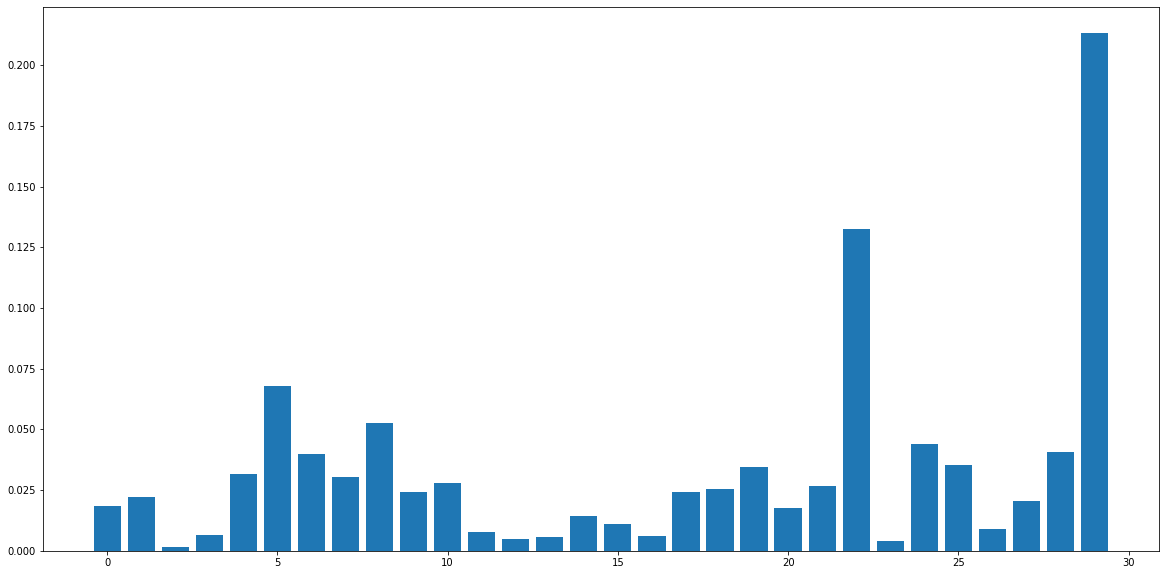

In [111]:
X_train_m = student_math_encoded.drop(['G3'], axis=1)
y_train_m = student_math_encoded['G3']

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X_train_m, y_train_m)
importance_mat = model.feature_importances_

# get importance
features=pd.DataFrame(({'Feature_names':student_math_encoded.drop('G3', axis =1).columns,'Importances':importance_mat}))
print((features.sort_values(by='Importances',ascending=False).head(10)))

# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(importance_mat))], importance_mat)
plt.show()

# Feature selection for mathematics dataset using SelectKBest

In [112]:
# SelectKBest with f_regression selecting 3 features 
D = 3
est = SelectKBest(f_regression,k=D)
X_new = est.fit_transform(X_train_m, y_train_m)
sup = est.get_support()
featurenames = X_train_m.columns
print("Features selected are:")
for nn in np.where(sup)[0]:
  print(featurenames[nn])


Features selected are:
higher
Medu
failures


# Mathematics model with all features - DecisionTreeRegressor and LinearRegression

In [113]:
# Find the best parameters for DecisionTreeRegressor()
dtr = DecisionTreeRegressor()
gridSearch = GridSearchCV(dtr,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch.fit(X_train_m, y_train_m)
gridSearchParam = gridSearch.best_params_
max_d = gridSearchParam['max_depth']
min_s = gridSearchParam['min_samples_split']

# Train with the best parameters for DecisionTreeRegressor()
dtr_all = DecisionTreeRegressor(max_depth=max_d, min_samples_split=min_s)
dtr_all = dtr_all.fit(X_train_m, y_train_m)

# Train linear regression for comparison
lin_all = LinearRegression()
lin_all = lin_all.fit(X_train_m, y_train_m)


# Testing the model on the Portuguese dataset

In [114]:
# Testing on Portuguese dataset
X_test_p = student_port_encoded.drop(['G3'], axis=1)
y_test_p = student_port_encoded['G3']

# Score & Predict values for Portuguese dataset decision tree regression
predicted_y_dtr = dtr_all.predict(X_test_p)
R2_math_all_dtr = dtr_all.score(X_test_p,y_test_p)
predicted_Table_dtr = pd.DataFrame({'Real Values ':y_test_p, 'Predicted Values ':predicted_y_dtr.reshape(-1)})
print("Decision tree regression score for Portuguese dataset: ", R2_math_all_dtr)

# Score & Predict values for Portuguese dataset linear regression
R2_math_all_lin = lin_all.score(X_test_p,y_test_p)
predicted_y_lin = lin_all.predict(X_test_p);
predicted_Table_lin = pd.DataFrame({'Real Values ':y_test_p, 'Predicted Values ':predicted_y_lin.reshape(-1)})
print("Linear regression score for Portuguese dataset: ", R2_math_all_lin)


# Calculate root mean square error decision tree regression
mse_dtr = mean_squared_error(y_test_p, predicted_y_dtr)
rmse_math_allfeat_dtr = np.sqrt(mse_dtr)
print('\nRMSE for decision tree regression:',rmse_math_allfeat_dtr)

# Calculate root mean square error linear regression
mse_lin = mean_squared_error(y_test_p, predicted_y_lin)
rmse_math_allfeat_lin = np.sqrt(mse_lin)
print('RMSE for linear regression:',rmse_math_allfeat_lin)


# Display the result
print("\nDecision tree regression table")
display(predicted_Table_dtr.head(10))
print("\nLinear regression table")
display(predicted_Table_lin.head(10))

Decision tree regression score for Portuguese dataset:  -0.11500143250583972
Linear regression score for Portuguese dataset:  -0.31092095657852936

RMSE for decision tree regression: 3.4087379576794703
RMSE for linear regression: 3.6961037815861433

Decision tree regression table


,Real Values,Predicted Values
0,11,10.553571
1,11,10.553571
2,12,10.553571
3,14,10.553571
4,13,10.553571
5,13,12.069444
6,13,12.069444
7,13,10.553571
8,17,12.069444
9,13,12.069444



Linear regression table


,Real Values,Predicted Values
0,11,9.905202
1,11,9.681620
2,12,11.925315
3,14,10.755500
4,13,10.573087
5,13,14.447545
6,13,12.501612
7,13,8.829712
8,17,13.563299
9,13,13.548343


# Decision tree vizualization for mathematics dataset

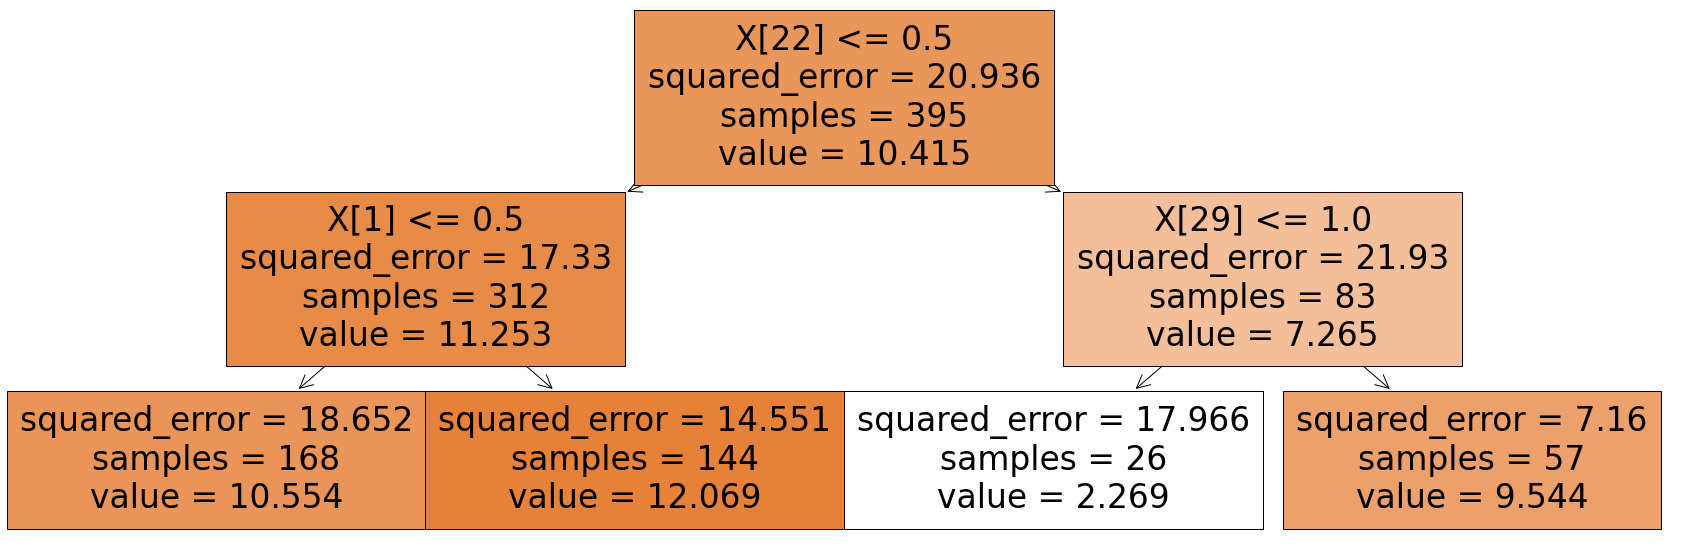

In [115]:
plt.figure(figsize=(30,10))
tree.plot_tree(dtr_all, filled=True)
plt.show()

# Mathematics model with features importance - DecisionTreeRegressor and LinearRegression

In [116]:
feature_importances_m=['failures','absences','Mjob']

X_train_fi_m = student_math_encoded[feature_importances_m]
y_train_fi_m = student_math_encoded['G3']

# Find the best parameters for DecisionTreeRegressor()
dtr = DecisionTreeRegressor()

gridSearch_fi = GridSearchCV(dtr,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch_fi.fit(X_train_fi_m, y_train_fi_m)
gridSearchParam_fi = gridSearch_fi.best_params_

max_d_fi = gridSearchParam_fi['max_depth']
min_s_fi = gridSearchParam_fi['min_samples_split']

# Train with the best parameters for DecisionTreeRegressor()
dtr_fi = DecisionTreeRegressor(max_depth=max_d_fi, min_samples_split=min_s_fi)
dtr_fi = dtr_fi.fit(X_train_fi_m, y_train_fi_m)

# Run linear regression for comparison
lin_fi = LinearRegression()
lin_fi = lin_fi.fit(X_train_fi_m, y_train_fi_m)


# Testing on Portugese dataset

In [117]:
# Testing on Portuguese dataset
X_test_p = student_port_encoded.drop(['G3'], axis=1)
X_test_fi_p = X_test_p[feature_importances_m]
y_test_fi_p = student_port_encoded['G3']

# Score & Predict values for feature importance on the Portuguese dataset decision tree regression
predicted_y_fi_dtr = dtr_fi.predict(X_test_fi_p)
R2_math_fi_dtr = dtr_fi.score(X_test_fi_p,y_test_fi_p)
predicted_Table_dtr = pd.DataFrame({'Real Values ':y_test_fi_p, 'Predicted Values ':predicted_y_fi_dtr.reshape(-1)})
print("Decision tree regression score with 3 features chosen with _feature_importances_:\n", R2_math_fi_dtr)


# Score & Predict values for feature importance on the Portuguese dataset linear regression
R2_math_fi_lin = lin_fi.score(X_test_fi_p,y_test_fi_p)
predicted_y_lin = lin_fi.predict(X_test_fi_p);
predicted_Table_lin = pd.DataFrame({'Real Values ':y_test_fi_p, 'Predicted Values ':predicted_y_lin.reshape(-1)})
print("Linear regression score with 3 features chosen with _feature_importances_:\n", R2_math_fi_lin)


# Calculate root mean square error decision tree regression
mse2_dtr = mean_squared_error(y_test_fi_p, predicted_y_fi_dtr)
rmse_math_fi_dtr = np.sqrt(mse2_dtr)
print('\nRMSE for _feature_importances_:',rmse_math_fi_dtr)

# Calculate root mean square error linear regression
mse_lin = mean_squared_error(y_test_fi_p, predicted_y_lin)
rmse_math_fi_lin = np.sqrt(mse_lin)
print('RMSE for linear regression:',rmse_math_fi_lin)

# Display the result
print("\nDecision tree regression table")
display(predicted_Table_dtr.head(10))
print("\nLinear regression table")
display(predicted_Table_lin.head(10))


Decision tree regression score with 3 features chosen with _feature_importances_:
 -0.14144063299531662
Linear regression score with 3 features chosen with _feature_importances_:
 -0.02074784790710482

RMSE for _feature_importances_: 3.448915612583094
RMSE for linear regression: 3.261483160105138

Decision tree regression table


,Real Values,Predicted Values
0,11,10.437500
1,11,10.437500
2,12,10.437500
3,14,13.125000
4,13,10.727273
5,13,12.674699
6,13,10.727273
7,13,11.552941
8,17,10.727273
9,13,10.727273



Linear regression table


,Real Values,Predicted Values
0,11,10.508997
1,11,10.447839
2,12,10.570155
3,14,10.659503
4,13,10.932324
5,13,11.388619
6,13,10.932324
7,13,10.993482
8,17,11.205145
9,13,10.932324


# Math model with SelectKBest (SKB) - DecisionTreeRegressor and LinearRegression

In [118]:
SelectKBest_m=['higher','Medu','failures']

X_train_SKB_m = student_math_encoded[SelectKBest_m]
y_train_SKB_m = student_math_encoded['G3']

# Find the best parameters for DecisionTreeRegressor()
dtr_find = DecisionTreeRegressor()

gridSearch_SKB_m = GridSearchCV(dtr_find,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch_SKB_m.fit(X_train_SKB_m, y_train_SKB_m)

gridSearchParam_SKB_m = gridSearch_SKB_m.best_params_

max_d_SKB_m = gridSearchParam_SKB_m['max_depth']
min_s_SKB_m = gridSearchParam_SKB_m['min_samples_split']

# Train with the best parameters for DecisionTreeRegressor()
dtr_SKB_m = DecisionTreeRegressor(max_depth=max_d_SKB_m, min_samples_split=min_s_SKB_m)
dtr_SKB_m = dtr_SKB_m.fit(X_train_SKB_m, y_train_SKB_m)

# Linear Regression
lin_SKB_m = LinearRegression()
lin_SKB_m = lin_SKB_m.fit(X_train_SKB_m, y_train_SKB_m)


# Testing on Portugese dataset

In [119]:
# Testing on Portuguese dataset
X_p = student_port_encoded.drop(['G3'], axis=1)
X_test_SKB_p = X_p[SelectKBest_m]
y_test_SKB_p = student_port_encoded['G3']

# Score & Predict values for Select K best on the Portuguese dataset decision tree regression 
predicted_y_SKB_dtr = dtr_SKB_m.predict(X_test_SKB_p)
R2_math_SKB_dtr = dtr_SKB_m.score(X_test_SKB_p,y_test_SKB_p)
predicted_Table_SKB_dtr = pd.DataFrame({'Real Values ':y_test_SKB_p, 'Predicted Values ':predicted_y_SKB_dtr.reshape(-1)})
print("Decision tree regression score with 3 features chosen with SelectKBest:\n",R2_math_SKB_dtr)


# Score & Predict values for Select K best on the Portuguese dataset linear regression 
predicted_y_SKB_lin = lin_SKB_m.predict(X_test_SKB_p);
R2_math_SKB_lin = lin_SKB_m.score(X_test_SKB_p,y_test_SKB_p)
predicted_Table_SKB_lin = pd.DataFrame({'Real Values ':y_test_SKB_p, 'Predicted Values ':predicted_y_SKB_lin.reshape(-1)})
print("Linear regression score for with 3 features chosen with SelectKBest:\n ", R2_math_SKB_lin)


# Calculate root mean square error for SelectKBest decision tree regression
mse3_dtr = mean_squared_error(y_test_SKB_p, predicted_y_SKB_dtr)
rmse_math_SKB_dtr = np.sqrt(mse3_dtr)
print('\nRMSE for decision tree regression SelectKBest:',rmse_math_SKB_dtr)


# Calculate root mean square error for SelectKBest linear regression
mse3_lin = mean_squared_error(y_test_SKB_p, predicted_y_SKB_lin)
rmse_math_SKB_lin = np.sqrt(mse3_lin)
print('RMSE for linear regression SelectKBest:',rmse_math_SKB_lin)

# Display the result
print('\nDecision tree regression table predicted values with 3 features chosen with SelectKBest:')
display(predicted_Table_SKB_dtr.head(10))

print("\nLinear regression table predicted values with 3 features chosen with SelectKBest:")
display(predicted_Table_SKB_lin.head(10))

Decision tree regression score with 3 features chosen with SelectKBest:
 -0.03754186002198656
Linear regression score for with 3 features chosen with SelectKBest:
  0.0040354181235655595

RMSE for decision tree regression SelectKBest: 3.288203730904072
RMSE for linear regression SelectKBest: 3.2216462490309272

Decision tree regression table predicted values with 3 features chosen with SelectKBest:


,Real Values,Predicted Values
0,11,12.150000
1,11,10.393939
2,12,10.393939
3,14,12.150000
4,13,11.291667
5,13,12.150000
6,13,10.423077
7,13,12.150000
8,17,11.291667
9,13,11.291667



Linear regression table predicted values with 3 features chosen with SelectKBest:


,Real Values,Predicted Values
0,11,11.816574
1,11,10.150589
2,12,10.150589
3,14,11.816574
4,13,11.261246
5,13,11.816574
6,13,10.705918
7,13,11.816574
8,17,11.261246
9,13,11.261246


# Feature selection for Portuguese dataset using feature_importances_

   Feature_names  Importances
22      failures     0.195002
27          Walc     0.068891
29      absences     0.061518
17           age     0.055975
7         reason     0.055214
19          Fedu     0.043842
0         school     0.041869
6           Fjob     0.041704
14        higher     0.039664
25         goout     0.039624


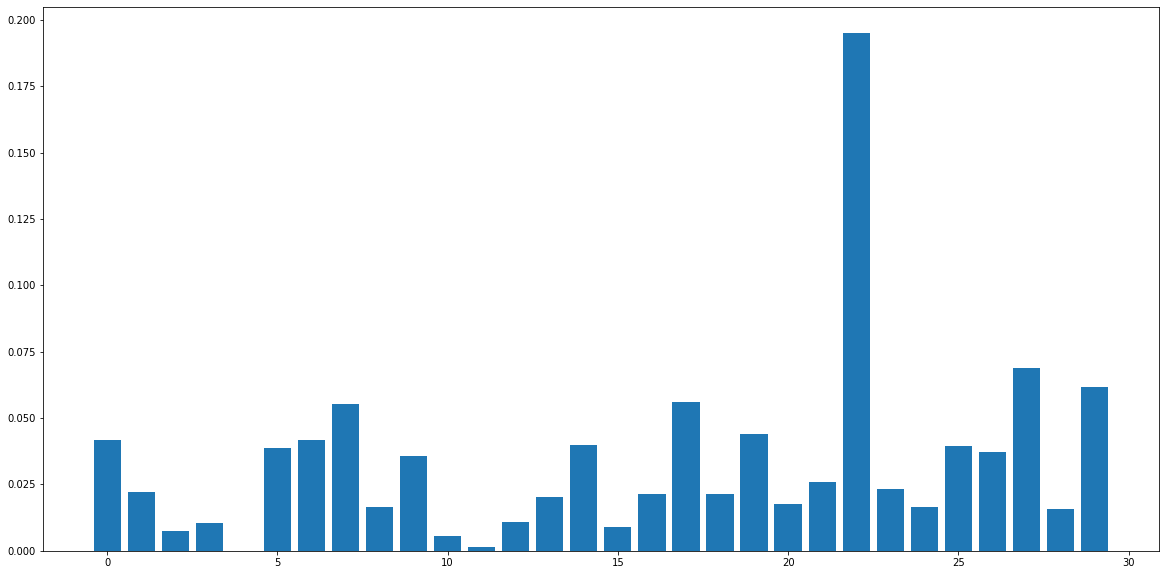

In [120]:
X_train_p = student_port_encoded.drop(['G3'], axis=1)
y_train_p = student_port_encoded['G3']

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X_train_p, y_train_p)
importance_por = model.feature_importances_

# get importance
features=pd.DataFrame(({'Feature_names':student_port_encoded.drop('G3', axis =1).columns,'Importances':importance_por}))
print((features.sort_values(by='Importances',ascending=False).head(10)))

# plot feature importance
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(importance_por))], importance_por)
plt.show()

# Feature selection for Portuguese dataset using SelectKBest

In [121]:
# SelectKBest with f_regression selecting 10 features 
D = 3
est = SelectKBest(f_regression,k=D)
X_new = est.fit_transform(X_train_p, y_train_p)
sup = est.get_support()
featurenames = X_train_p.columns

print("Features selected are:")
for nn in np.where(sup)[0]:
  print(featurenames[nn])


Features selected are:
school
higher
failures


# Portuguese model with all features using DecisionTreeRegressor and LinearRegression

In [122]:
# Find the best parameters for DecisionTreeRegressor()
dtr_ = DecisionTreeRegressor()
gridSearch = GridSearchCV(dtr_,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch.fit(X_train_p, y_train_p)
gridSearchParam = gridSearch.best_params_
max_d = gridSearchParam['max_depth']
min_s = gridSearchParam['min_samples_split']

# Use the best parameters for DecisionTreeRegressor() and train it
dtr_p = DecisionTreeRegressor(max_depth=max_d, min_samples_split=min_s)
dtr_p = dtr_p.fit(X_train_p, y_train_p)

# Train linear regression for comparison
lin_p = LinearRegression()
lin_p = lin_p.fit(X_train_p, y_train_p)


# Testing the model on the math dataset

In [123]:
# Testing on math dataset
X_test_m = student_math_encoded.drop(['G3'], axis=1)
y_test_m = student_math_encoded['G3']

# Score & Predict values for math dataset decision tree regression
predicted_y_dtr = dtr_p.predict(X_test_m)
R2_port_all_dtr = dtr_p.score(X_test_m,y_test_m)
predicted_Table_dtr = pd.DataFrame({'Real Values ':y_test_m, 'Predicted Values ':predicted_y_dtr.reshape(-1)})
print("Decision tree regression score for math dataset: ", R2_port_all_dtr)

# Score & Predict values for math dataset linear regression
R2_port_all_lin = lin_p.score(X_test_m,y_test_m)
predicted_y_lin = lin_p.predict(X_test_m);
predicted_Table_lin = pd.DataFrame({'Real Values ':y_test_m, 'Predicted Values ':predicted_y_lin.reshape(-1)})
print("Linear regression score for Portuguese dataset: ", R2_port_all_lin)


# Calculate root mean square error decision tree regression
mse_dtr = mean_squared_error(y_test_m, predicted_y_dtr)
rmse_port_allfeat_dtr = np.sqrt(mse_dtr)
print('\nRMSE for decision tree regression:',rmse_port_allfeat_dtr)

# Calculate root mean square error linear regression
mse_lin = mean_squared_error(y_test_m, predicted_y_lin)
rmse_port_allfeat_lin = np.sqrt(mse_lin)
print('RMSE for linear regression:',rmse_port_allfeat_lin)

# Display the result
print("\nDecision tree regression table")
display(predicted_Table_dtr.head(10))
print("\nLinear regression table")
display(predicted_Table_lin.head(10))


Decision tree regression score for math dataset:  0.04887733136846828
Linear regression score for Portuguese dataset:  -0.015105465884003522

RMSE for decision tree regression: 4.462416268046876
RMSE for linear regression: 4.610068696300129

Decision tree regression table


,Real Values,Predicted Values
0,6,12.510018
1,6,12.510018
2,10,8.590000
3,15,12.510018
4,10,12.510018
5,15,12.510018
6,11,12.510018
7,6,12.510018
8,19,12.510018
9,15,12.510018



Linear regression table


,Real Values,Predicted Values
0,6,12.444073
1,6,13.643363
2,10,6.513599
3,15,12.934119
4,10,12.743069
5,15,12.859595
6,11,13.072586
7,6,13.010634
8,19,13.210361
9,15,12.771360


# Decision tree vizualization for Portuguese data

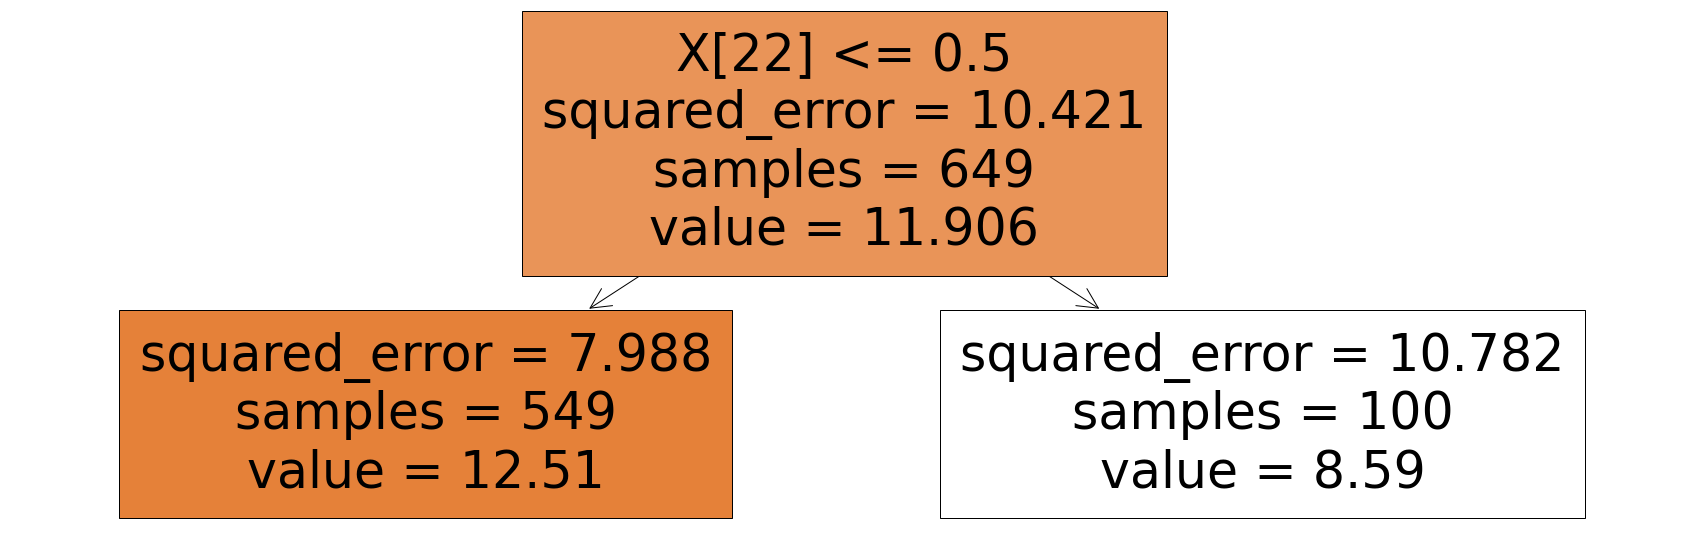

In [124]:
plt.figure(figsize=(30,10))
tree.plot_tree(dtr_p, filled=True)
plt.show()

# Portugese model with feature importance using DecisionTreeRegressor and LinearRegression

In [125]:
# Lists of the selected features
feature_importances_p=['failures','Walc','age']

X_train_fi_p = student_port_encoded[feature_importances_p]
y_train_fi_p = student_port_encoded['G3']

# Find the best parameters for DecisionTreeRegressor()
dtr_fi = DecisionTreeRegressor()

gridSearch_fi = GridSearchCV(dtr_fi,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch_fi.fit(X_train_fi_p, y_train_fi_p)

gridSearchParam_fi = gridSearch_fi.best_params_

max_d_fi = gridSearchParam_fi['max_depth']
min_s_fi = gridSearchParam_fi['min_samples_split']


# Train with the best parameters for DecisionTreeRegressor()
dtr_fi = DecisionTreeRegressor(max_depth=max_d_fi, min_samples_split=min_s_fi)
dtr_fi = dtr_fi.fit(X_train_fi_p, y_train_fi_p)

# Train linear regression for comparison
lin_fi = LinearRegression()
lin_fi = lin_fi.fit(X_train_fi_p, y_train_fi_p)

# Testing the model on the math dataset with feature importance

In [126]:
# Testing on math dataset
X_m = student_math_encoded.drop(['G3'], axis=1)
X_test_fi_m = X_m[feature_importances_p]
y_test_fi_m = student_math_encoded['G3']

# Score & Predict values for feature importance on the math dataset decision tree regression
predicted_y_fi_dtr = dtr_fi.predict(X_test_fi_m)
R2_port_fi_dtr = dtr_fi.score(X_test_fi_m,y_test_fi_m)
predicted_Table_fi_dtr = pd.DataFrame({'Real Values ':y_test_fi_m, 'Predicted Values ':predicted_y_fi_dtr.reshape(-1)})
print("Decision tree regression score with 3 features chosen with _feature_importances_:\n", R2_port_fi_dtr)


# Score & Predict values for feature importance on the math dataset linear regression
R2_port_fi_lin = lin_fi.score(X_test_fi_m,y_test_fi_m)
predicted_y_lin = lin_fi.predict(X_test_fi_m);
predicted_Table_lin = pd.DataFrame({'Real Values ':y_test_fi_m, 'Predicted Values ':predicted_y_lin.reshape(-1)})
print("Linear regression score with 3 features chosen with _feature_importances_:\n", R2_port_fi_lin)


# Calculate root mean square error decision tree regression
mse2_dtr = mean_squared_error(y_test_fi_m, predicted_y_fi_dtr)
rmse_port_fi_dtr = np.sqrt(mse2_dtr)
print('\nRMSE for _feature_importances_:',rmse_port_fi_dtr)

# Calculate root mean square error linear regression
mse_lin = mean_squared_error(y_test_fi_m, predicted_y_lin)
rmse_port_fi_lin = np.sqrt(mse_lin)
print('RMSE for linear regression:',rmse_port_fi_lin)

# Display the result
print("\nDecision tree regression table")
display(predicted_Table_dtr.head(10))
print("\nLinear regression table")
display(predicted_Table_lin.head(10))

Decision tree regression score with 3 features chosen with _feature_importances_:
 0.046928272996655584
Linear regression score with 3 features chosen with _feature_importances_:
 0.04202959126168215

RMSE for _feature_importances_: 4.466986161530171
RMSE for linear regression: 4.478451351784993

Decision tree regression table


,Real Values,Predicted Values
0,6,12.510018
1,6,12.510018
2,10,8.590000
3,15,12.510018
4,10,12.510018
5,15,12.510018
6,11,12.510018
7,6,12.510018
8,19,12.510018
9,15,12.510018



Linear regression table


,Real Values,Predicted Values
0,6,12.957221
1,6,12.873969
2,10,5.575123
3,15,12.707467
4,10,12.420604
5,15,12.420604
6,11,12.790718
7,6,12.873969
8,19,12.707467
9,15,12.707467


# Portugese model with SelectKBest (SKB) using DecisionTreeRegressor and LinearRegression

In [127]:
SelectKBest_p=['school','higher','failures']

X_train_SKB_p = student_port_encoded[SelectKBest_p]
y_train_SKB_p = student_port_encoded['G3']

# Find the best parameters for DecisionTreeRegressor()
dtr_SKB = DecisionTreeRegressor()

gridSearch_SKB = GridSearchCV(dtr_SKB,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 60, 10)},cv=5,n_jobs=1,
                  scoring='neg_mean_squared_error')

gridSearch_SKB.fit(X_train_SKB_p, y_train_SKB_p)
gridSearchParam_SKB = gridSearch_SKB.best_params_

max_d_SKB = gridSearchParam_SKB['max_depth']
min_s_SKB = gridSearchParam_SKB['min_samples_split']

# Train with the best parameters for DecisionTreeRegressor()
dtr_SKB = DecisionTreeRegressor(max_depth=max_d_SKB, min_samples_split=min_s_SKB)
dtr_SKB = dtr_SKB.fit(X_train_SKB_p, y_train_SKB_p)

# Run linear regression for comparison
lin_SKB = LinearRegression()
lin_SKB = lin_SKB.fit(X_train_SKB_p, y_train_SKB_p)


# Testing on math dataset SelectKBest (SKB)

In [128]:
# Testing on math dataset
X_m = student_math_encoded.drop(['G3'], axis=1)
X_test_SKB_m = X_m[SelectKBest_p]
y_test_SKB_m = student_math_encoded['G3']


# Score & Predict values for Select K best on the  math dataset decision tree regression 
predicted_y_SKB_dtr = dtr_SKB.predict(X_test_SKB_m)
R2_port_SKB_dtr = dtr_SKB.score(X_test_SKB_m,y_test_SKB_m)
predicted_Table_SKB_dtr = pd.DataFrame({'Real Values ':y_test_SKB_m, 'Predicted Values ':predicted_y_SKB_dtr.reshape(-1)})
print("Decision tree regression score with 3 features chosen with SelectKBest:\n",R2_port_SKB_dtr)


# Score & Predict values for Select K best on the Portuguese dataset linear regression 
predicted_y_SKB_lin = lin_SKB.predict(X_test_SKB_m);
R2_port_SKB_lin = lin_SKB.score(X_test_SKB_m,y_test_SKB_m)
predicted_Table_SKB_lin = pd.DataFrame({'Real Values ':y_test_SKB_m, 'Predicted Values ':predicted_y_SKB_lin.reshape(-1)})
print("Linear regression score for with 3 features chosen with SelectKBest:\n ", R2_port_SKB_lin)


# Calculate root mean square error for SelectKBest decision tree regression
mse3_dtr = mean_squared_error(y_test_SKB_m, predicted_y_SKB_dtr)
rmse_port_SKB_dtr = np.sqrt(mse3_dtr)
print('\nRMSE for decision tree regression SelectKBest:',rmse_port_SKB_dtr)


# Calculate root mean square error for SelectKBest linear regression
mse3_lin = mean_squared_error(y_test_SKB_m, predicted_y_SKB_lin)
rmse_port_SKB_lin = np.sqrt(mse3_lin)
print('RMSE for linear regression SelectKBest:',rmse_port_SKB_lin)

# Display the result
print('\nDecision tree regression table predicted values with 3 features chosen with SelectKBest:')
display(predicted_Table_SKB_dtr.head(10))

print("\nLinear regression table predicted values with 3 features chosen with SelectKBest:")
display(predicted_Table_SKB_lin.head(10))

Decision tree regression score with 3 features chosen with SelectKBest:
 -0.02052727352160133
Linear regression score for with 3 features chosen with SelectKBest:
  -0.024023269150079463

RMSE for decision tree regression SelectKBest: 4.622363782917556
RMSE for linear regression SelectKBest: 4.63027437390495

Decision tree regression table predicted values with 3 features chosen with SelectKBest:


,Real Values,Predicted Values
0,6,13.091667
1,6,13.091667
2,10,10.193548
3,15,13.091667
4,10,13.091667
5,15,13.091667
6,11,13.091667
7,6,13.091667
8,19,13.091667
9,15,13.091667



Linear regression table predicted values with 3 features chosen with SelectKBest:


,Real Values,Predicted Values
0,6,13.027138
1,6,13.027138
2,10,8.064638
3,15,13.027138
4,10,13.027138
5,15,13.027138
6,11,13.027138
7,6,13.027138
8,19,13.027138
9,15,13.027138


# Comparison between R2 scores from Decision Tree Regressor

In [129]:
score_all = {"Math score all features": R2_math_all_dtr,"Portugese score all features": R2_port_all_dtr, "Math feature importance": R2_math_fi_dtr, "Math SelectKBest": R2_math_SKB_dtr, "Portugese feature importance": R2_port_fi_dtr, "Portugese SelectKBest": R2_port_SKB_dtr}

numpyArray = np.array([[R2_math_all_dtr,R2_port_all_dtr], [R2_math_fi_dtr,R2_port_fi_dtr], [R2_math_SKB_dtr,R2_port_SKB_dtr]])

R2_table_dtr = pd.DataFrame(data = numpyArray, 
                        index = ["Score all features", "Feature importance", "SelectKBest"], 
                        columns = ["Training math, testing port","Training port, testing math"])
R2_table_dtr.head()

,"Training math, testing port","Training port, testing math"
Score all features,-0.115001,0.048877
Feature importance,-0.141441,0.046928
SelectKBest,-0.037542,-0.020527


# Comparison between R2 scores from Linear Regression

In [130]:
score_all = {"Math score all features": R2_math_all_lin,"Portugese score all features": R2_port_all_lin, "Math feature importance": R2_math_fi_lin, "Math SelectKBest": R2_math_SKB_lin, "Portugese feature importance": R2_port_fi_lin, "Portugese SelectKBest": R2_port_SKB_lin}

numpyArray = np.array([[R2_math_all_lin,R2_port_all_lin], [R2_math_fi_lin,R2_port_fi_lin], [R2_math_SKB_lin,R2_port_SKB_lin]])

R2_table_lin = pd.DataFrame(data = numpyArray, 
                        index = ["Score all features", "Feature importance", "SelectKBest"], 
                        columns = ["Training math, testing port","Training port, testing math"])

R2_table_lin.head()


,"Training math, testing port","Training port, testing math"
Score all features,-0.310921,-0.015105
Feature importance,-0.020748,0.042030
SelectKBest,0.004035,-0.024023


# Comparison between RMSE from Decision Tree Regressor

In [131]:
rmse_all = {"rmse math score all features": rmse_math_allfeat_dtr,
            "rmse portugese score all features": rmse_port_allfeat_dtr, 
            "rmse math feature importance": rmse_math_fi_dtr, 
            "rmse math SelectKBest": rmse_math_SKB_dtr, 
            "rmse portugese feature importance": rmse_port_fi_dtr, 
            "rmse portugese SelectKBest":  rmse_port_SKB_dtr}

numpyArray = np.array([[rmse_math_allfeat_dtr,rmse_port_allfeat_dtr], [rmse_math_fi_dtr,rmse_port_fi_dtr], [rmse_math_SKB_dtr,rmse_port_SKB_dtr]])

rmse_table_dtr = pd.DataFrame(data = numpyArray, 
                        index = ["RMSE all features", "RMSE feature importance", "RMSE SelectKBest"], 
                        columns = ["Training math, testing port","Training port, testing math"])
rmse_table_dtr.head()

,"Training math, testing port","Training port, testing math"
RMSE all features,3.408738,4.462416
RMSE feature importance,3.448916,4.466986
RMSE SelectKBest,3.288204,4.622364


# Comparison between RMSE from Linear Regression

In [132]:
rmse_all = {"rmse math score all features": rmse_math_allfeat_lin,
            "rmse portugese score all features": rmse_port_allfeat_lin, 
            "rmse math feature importance": rmse_math_fi_lin, 
            "rmse math SelectKBest": rmse_math_SKB_lin, 
            "rmse portugese feature importance": rmse_port_fi_lin, 
            "rmse portugese SelectKBest":  rmse_port_SKB_lin}

numpyArray = np.array([[rmse_math_allfeat_lin,rmse_port_allfeat_lin], [rmse_math_fi_lin,rmse_port_fi_lin], [rmse_math_SKB_lin,rmse_port_SKB_lin]])

rmse_table_lin = pd.DataFrame(data = numpyArray, 
                        index = ["RMSE all features", "RMSE feature importance", "RMSE SelectKBest"], 
                        columns = ["Training math, testing port","Training port, testing math"])
rmse_table_lin.head()

,"Training math, testing port","Training port, testing math"
RMSE all features,3.696104,4.610069
RMSE feature importance,3.261483,4.478451
RMSE SelectKBest,3.221646,4.630274
